<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gluoncv

     |████████████████████████████████| 757kB 3.4MB/s 


In [2]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 58kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

In [4]:
model = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

121888KB [00:02, 52032.13KB/s]                            


# **Image Utils**

In [0]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def upload():
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      return name

def download(path):
  from google.colab import files
  files.download(path)

def dipslayImage(path):
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

100%|██████████| 244/244 [00:00<00:00, 5590.79KB/s]


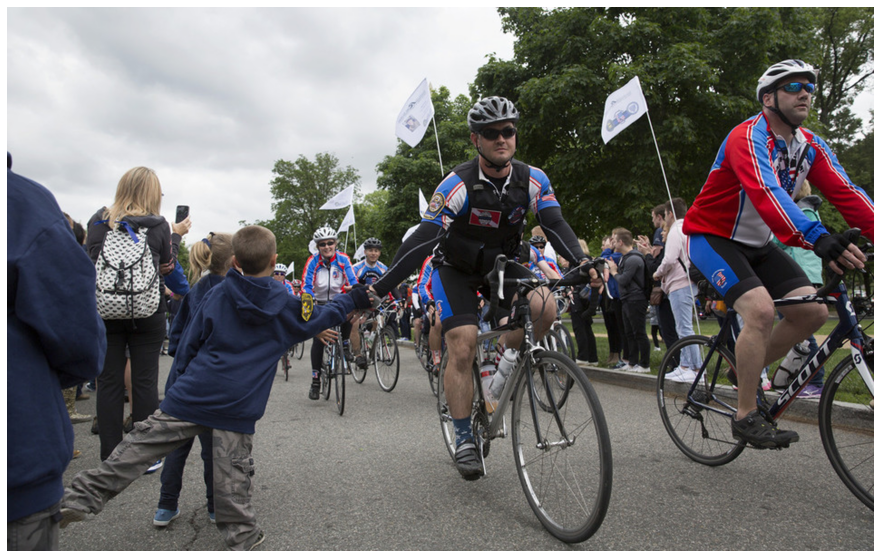

In [6]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
dipslayImage(im_fname)
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

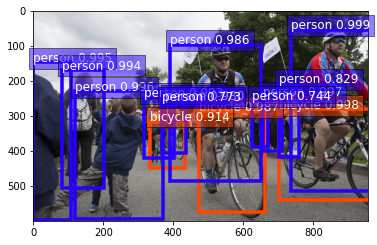

In [10]:
box_ids, scores, bboxes = model(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=model.classes)